## Task 2d
### Load data
Use the MNIST dataset and permutated MNIST dataset provided on ilias.

In [5]:
import torch
from torchvision import datasets
from torchvision import transforms

PATH = "../../../data"
batch_size = 4

# MNIST
training_data = datasets.ImageFolder(
   root=PATH + "/mnist-png-format/train",
   transform=transforms.Compose([transforms.Grayscale(), transforms.ToTensor()])
)
trainloader = torch.utils.data.DataLoader(training_data, batch_size=batch_size, shuffle=True, num_workers=2)

test_data = datasets.ImageFolder(
   root=PATH + "/mnist-png-format/test",
   transform=transforms.Compose([transforms.Grayscale(), transforms.ToTensor()])
)
testloader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False, num_workers=2)

# permutated MNIST
permutated_training_data = datasets.ImageFolder(
   root=PATH + "/mnist-png-format-permutated/train",
   transform=transforms.Compose([transforms.Grayscale(), transforms.ToTensor()])
)
permutated_trainloader = torch.utils.data.DataLoader(permutated_training_data, batch_size=batch_size, shuffle=True, num_workers=2)

permutated_test_data = datasets.ImageFolder(
   root=PATH + "/mnist-png-format-permutated/test",
   transform=transforms.Compose([transforms.Grayscale(), transforms.ToTensor()])
)
permutated_testloader = torch.utils.data.DataLoader(permutated_test_data, batch_size=batch_size, shuffle=False, num_workers=2)

Define helper function to train a CNN and compute accuracy on the test set.

In [6]:
from model_task2c import PR_CNN

import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ExponentialLR

def get_accuracy(trainloader, testloader, num_epochs = 10):
    net = PR_CNN()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9)
    scheduler = ExponentialLR(optimizer, gamma=0.5)

    test_acc = []

    for epoch in range(num_epochs):  # loop over the dataset multiple times
        net.train()
        for inputs, labels in trainloader:

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        # test model on test data
        net.eval()
        running_accuracy = total = 0.0
        with torch.no_grad():
            for images, labels in testloader:
                # calculate outputs by running images through the network
                outputs = net(images)

                # compute accuracy
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                running_accuracy += (predicted == labels).sum().item()

            # save the current training information
            test_acc.append(running_accuracy / total)
            print(f"Test {epoch + 1} accuracy: {running_accuracy / total:.3f}")

        # adjust the learning rate
        scheduler.step()

    return test_acc

Compute accuracy for both set.

In [8]:
num_epochs = 15
print("---------------------MNIST---------------------")
test_acc = get_accuracy(trainloader, testloader, num_epochs = num_epochs)

print("---------------Permutated MNIST---------------")
permutated_test_acc = get_accuracy(permutated_trainloader, permutated_testloader, num_epochs = num_epochs)

---------------------MNIST---------------------
Test 1 accuracy: 0.915
Test 2 accuracy: 0.928
Test 3 accuracy: 0.948
Test 4 accuracy: 0.967
Test 5 accuracy: 0.969
Test 6 accuracy: 0.974
Test 7 accuracy: 0.974
Test 8 accuracy: 0.975
Test 9 accuracy: 0.976
Test 10 accuracy: 0.975
Test 11 accuracy: 0.975
Test 12 accuracy: 0.975
Test 13 accuracy: 0.975
Test 14 accuracy: 0.975
Test 15 accuracy: 0.975
---------------Permutated MNIST---------------
Test 1 accuracy: 0.889
Test 2 accuracy: 0.913
Test 3 accuracy: 0.930
Test 4 accuracy: 0.934
Test 5 accuracy: 0.937
Test 6 accuracy: 0.940
Test 7 accuracy: 0.940
Test 8 accuracy: 0.940
Test 9 accuracy: 0.941
Test 10 accuracy: 0.940
Test 11 accuracy: 0.940
Test 12 accuracy: 0.940
Test 13 accuracy: 0.940
Test 14 accuracy: 0.940
Test 15 accuracy: 0.940


Plot graph showing the evolution of the accuracy with epoch.

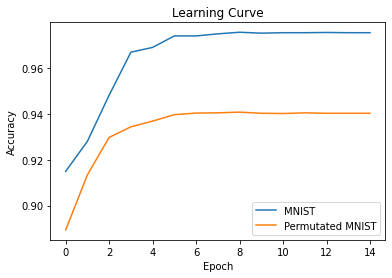

In [13]:
import matplotlib.pyplot as plt

# plotting
plt.title("Learning Curve")
plt.plot(range(num_epochs), test_acc, label="MNIST")
plt.plot(range(num_epochs), permutated_test_acc, label="Permutated MNIST")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc='best')
plt.show()

### Analysis of the results

We can see that the learning curve for the permutated dataset has a consistently lower performance. CNN exploit the spacial relationship between pixels with the convolution kernels. However the accuracy shows that the prediction is far from random because the separation between classes still remains.